<a href="https://colab.research.google.com/github/goyal786/Natural-Gas-Price-Forecasting-Model/blob/main/Nat_Gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2924578812.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-2924578812.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1),


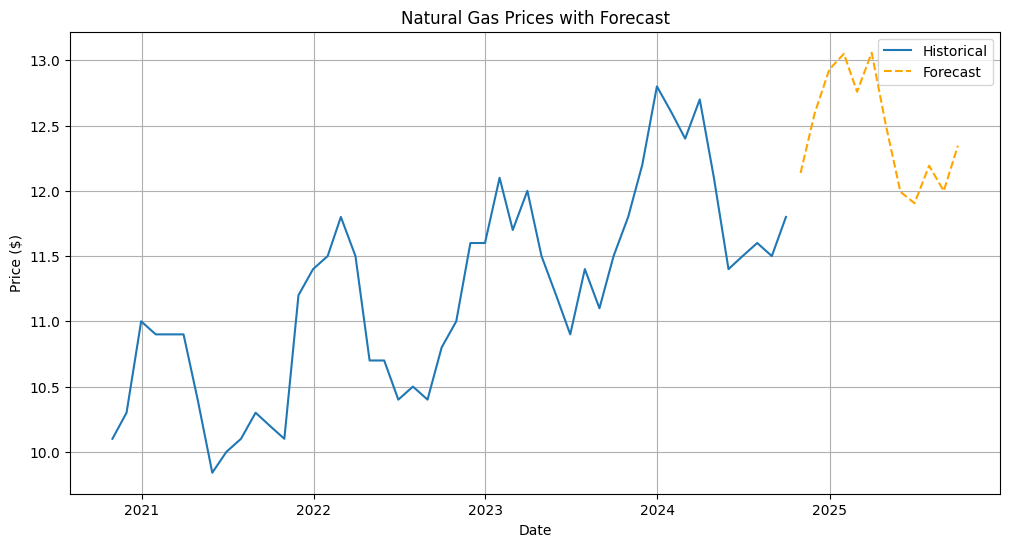

'Date out of supported range (2020-10-31 to 2025-09-30).'

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 2: Load your dataset
df = pd.read_csv('/content/Nat_Gas.csv')  # adjust path if needed
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

# Step 3: Fit SARIMA model
model = SARIMAX(df['Prices'], order=(1,1,1), seasonal_order=(1,1,0,12),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Step 4: Forecast 12 future months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1),
                               periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Step 5: Combine historical and forecasted prices
full_series = pd.concat([df['Prices'], forecast_series])

# Optional: plot the full series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], label='Historical')
plt.plot(forecast_series.index, forecast_series, label='Forecast', linestyle='--', color='orange')
plt.title('Natural Gas Prices with Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Interpolate daily values
full_daily = full_series.resample('D').interpolate('time')

# Step 7: Define the function to estimate price for any date
def estimate_gas_price(input_date_str):
    try:
        input_date = pd.to_datetime(input_date_str)
        if input_date < full_daily.index[0] or input_date > full_daily.index[-1]:
            return f"Date out of supported range ({full_daily.index[0].date()} to {full_daily.index[-1].date()})."
        estimated_price = round(full_daily.loc[input_date], 2)
        return f"Estimated natural gas price on {input_date.date()}: ${estimated_price}"
    except Exception as e:
        return f"Error: {e}"

# Step 8: Example usage
estimate_gas_price("2026-08-10")

